Question 1.1

In [1]:
import numpy as np
np.random.seed(42)
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

In [2]:
def fetch_mnist():
    # Download MNIST dataset
    X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
    # Randomly sample 8000 images
    np.random.seed(2)
    indices = np.random.choice(len(X), 8000, replace=False)
    
    X, y = X[indices], y[indices]
    return X, y

X, y = fetch_mnist()
print(X.shape, y.shape)

(8000, 784) (8000,)


Question 1.2

In [3]:
from sklearn.decomposition import PCA
pca = PCA().fit(X)

In [4]:
pca.components_

array([[-4.69337428e-20,  2.42861287e-17, -8.32667268e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-1.40435167e-19, -7.63278329e-17, -1.11022302e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.91207566e-19,  1.38777878e-17, -5.55111512e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       ...,
       [ 0.00000000e+00, -8.04613903e-02,  2.59629077e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-0.00000000e+00,  2.95100438e-02,  1.86784874e-02, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 0.00000000e+00, -1.15071909e-01,  1.03930147e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

Question 1.3

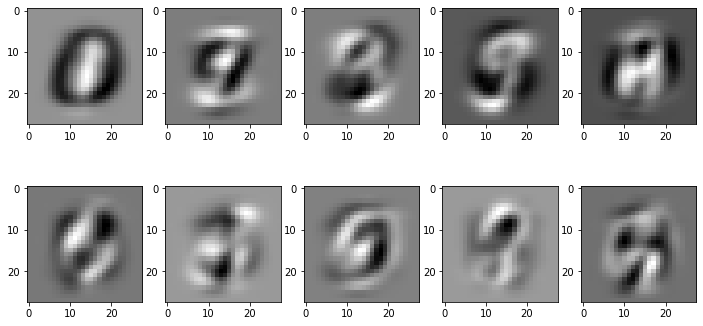

In [5]:
def show_first_10():
    k=10
    X_k = np.reshape(pca.components_[:k], (k,28,28))
    
    fig = plt.figure(figsize=(12,6))
    columns=5
    rows=2
    ax=[]
    for i in range(columns*rows):
        # create subplot and append to ax
        ax.append(fig.add_subplot(rows,columns,i+1))
        plt.imshow(X_k[i],cmap="binary")
    plt.show()
        
show_first_10()

The images represent the eigenvectors corresponding to the largest 10 eigenvalues.

Question 1.4

Text(0, 0.5, 'Expained Variance')

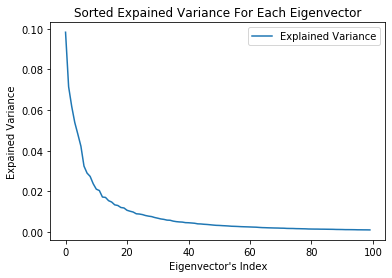

In [6]:
plt.plot([m for m in range(100)], pca.explained_variance_ratio_[:100], label="Explained Variance")
plt.title("Sorted Expained Variance For Each Eigenvector")
plt.legend()
plt.xlabel("Eigenvector's Index")
plt.ylabel("Expained Variance")

Text(0, 0.5, 'Accumulated Expained Variance')

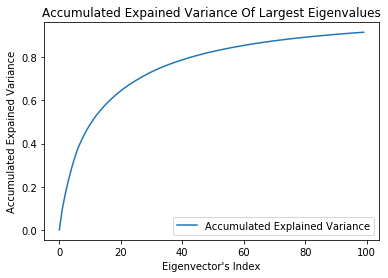

In [7]:
plt.plot([m for m in range(100)], [pca.explained_variance_ratio_[:i].sum() for i in range(100)],  label="Accumulated Explained Variance")
plt.title("Accumulated Expained Variance Of Largest Eigenvalues")
plt.legend()
plt.xlabel("Eigenvector's Index")
plt.ylabel("Accumulated Expained Variance")

Question 1.5

In [8]:
def get_n_with_var(v=1):
    for i in range(pca.n_components_):
        if pca.explained_variance_ratio_[:i].sum() >= v:
            return i
    return pca.n_components_

In [9]:
get_n_with_var(0.5)

11

In [10]:
def get_title(i):
    if i in range(0,5):
        v = 0.5
    elif i in range(5,10):
        v = 0.8
    else:
        v = 0.95
    n = get_n_with_var(v)
    s = "y={}, v={}, n={}".format(y[i%5],v,n)
    return s

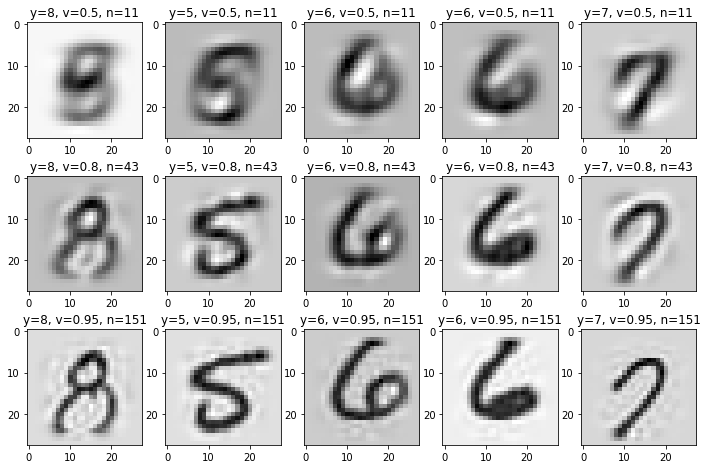

In [11]:
X_tranformed = np.array([])
for v in [0.5, 0.8, 0.95]:
    pca = PCA(n_components=v, svd_solver='full')
    pca.fit(X)
    X_5 = X[:5]
    X_5 = pca.transform(X_5)
    X_5 = pca.inverse_transform(X_5)
    X_tranformed = np.append(X_tranformed, X_5)

k=15
X_k = np.reshape(X_tranformed, (k,28,28))
fig = plt.figure(figsize=(12,8))
columns=5
rows=3
ax=[]

for i in range(columns*rows):
    # create subplot and append to ax
    ax.append(fig.add_subplot(rows,columns,i+1))
    plt.imshow(X_k[i],cmap="binary")
    plt.title(get_title(i))
plt.show()

The quality of the reconstruction get better as we increase the explained variance, this observation fits our expectation: As we saw in the lecture, increasing the explained variance is decreasing the reconstruction error, meaning we are able to reconstruct the original data more accurately.

Question 1.6

In [12]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [13]:
pca = PCA(n_components=0.8, svd_solver='full').fit(X)
X_tranformed = pca.transform(X)

svc = SVC()
knn = KNeighborsClassifier()
svc_t = SVC()
knn_t = KNeighborsClassifier()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train_t,X_test_t,y_train_t,y_test_t = train_test_split(X_tranformed,y,test_size=0.3,random_state=42)

svc.fit(X_train, y_train)
knn.fit(X_train, y_train)
svc_t.fit(X_train_t, y_train_t)
knn_t.fit(X_train_t, y_train_t)

svc_train_score = svc.score(X_train, y_train)
svc_test_score = svc.score(X_test, y_test)
knn_train_score = knn.score(X_train, y_train)
knn_test_score = knn.score(X_test, y_test)

svc_t_train_score = svc_t.score(X_train_t, y_train_t)
svc_t_test_score = svc_t.score(X_test_t, y_test_t)
knn_t_train_score = knn_t.score(X_train_t, y_train_t)
knn_t_test_score = knn_t.score(X_test_t, y_test_t)

print("svc train error rate:", 1-svc_train_score)
print("svc test error rate:", 1-svc_test_score)
print("svc_transforemed train error rate:", 1-svc_t_train_score)
print("svc_transforemed test error rate:", 1-svc_t_test_score)

print("knn train error rate:", 1-knn_train_score)
print("knn test error rate:", 1-knn_test_score)
print("knn_transforemed train error rate:", 1-knn_t_train_score)
print("knn_transforemed test error rate:", 1-knn_t_test_score)

svc train error rate: 0.015000000000000013
svc test error rate: 0.04500000000000004
svc_transforemed train error rate: 0.013214285714285734
svc_transforemed test error rate: 0.03749999999999998
knn train error rate: 0.043749999999999956
knn test error rate: 0.060833333333333295
knn_transforemed train error rate: 0.038214285714285756
knn_transforemed test error rate: 0.050833333333333286


We notice that the test error of the models using PCA is smaller than those which does not. Curse of dimensionality could provide a possible explantation for the above results. When using PCA we reduce the dimensoinality of the data and presumably reduce some of the noice. Models such as KNN and SVC are highly affected by high dimensional data since they use distance to classify, therefore PCA improves the test results when reducing the dimensions.

Question 3

In [14]:
def get_title(i):
    if (i+1)%6!=0:
        return str(2*((i+1)%6))+" colors"
    else:
        return "Original Image"

In [15]:
from sklearn.cluster import KMeans
def segement_image_with_kmeans(img, num_colors):
    img_width, img_height, temp = img.shape
    X = np.reshape(img, (img_width*img_height, 3))

    knn = KMeans(n_clusters=num_colors, random_state=42).fit(X)
    X_segmented = np.array([knn.cluster_centers_[i] for i in knn.predict(X)])
    img_segmented = np.reshape(X_segmented, (img_width, img_height, 3))
    
    return img_segmented

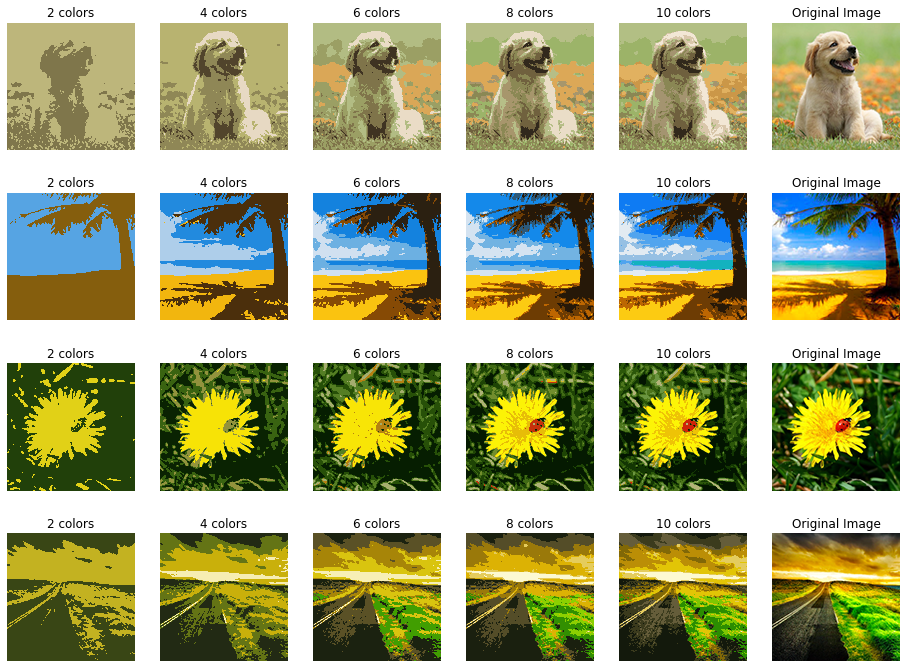

In [16]:
from matplotlib.image import imread
imgs = ['dog.png', 'beach.png', 'ladybug.png', 'road.png']
K = [j for j in range(2,12,2)]
transfomed_imgs = np.array([])

for i in imgs:
    for k in K:
        img = imread(i)
        img_segmented = segement_image_with_kmeans(img, k)
        transfomed_imgs = np.append(transfomed_imgs, img_segmented)
    transfomed_imgs = np.append(transfomed_imgs, np.reshape(img, (128,128,3)))

columns=6
rows=4
k=columns*rows
X_k = np.reshape(transfomed_imgs, (k,128,128,3))
fig = plt.figure(figsize=(16,12))
ax=[]

for i in range(columns*rows):
    # create subplot and append to ax
    ax.append(fig.add_subplot(rows,columns,i+1))
    plt.imshow(X_k[i],cmap="binary")
    plt.axis('off')
    plt.title(get_title(i))
plt.show()